# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

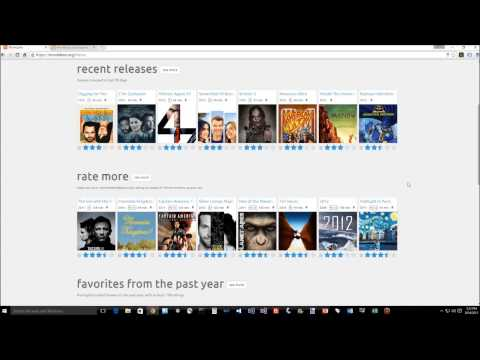

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM 12 Members:** 

    Chu Wang
    Saranya Manoharan
    Rishitha Kiran
    Di You
    Valerie Tuzel

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import h5py
#import vincent
#vincent.core.initialize_notebook()
pd.set_option("display.max_columns",None)
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

#define col name
unames = ['user_id','gender','age','occupation','zip']
rnames = ['user_id','movie_id','rating','timestamp']
mnames = ['movie_id','title','genres']

# read data
users = pd.read_table('users.dat',sep='::',header=None,names=unames,engine='python')
ratings = pd.read_table('ratings.dat',sep='::',header=None,names=rnames,engine='python')
movies = pd.read_table('movies.dat',sep='::',header=None,names=mnames,engine='python')

#merge data
data = pd.merge(pd.merge(ratings, users), movies) 
data.head()
#data.shape



,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [78]:
#Storing the data into an HDF5 file
data_hdf = pd.HDFStore('data.h5', 'w', complevel=4, complib='blosc')
data_hdf['data1'] = data
data_hdf.close()
#data1 = pd.read_hdf('data.h5', 'data1')

#data.to_hdf('data1.h5', 'data1')
#print(data1, data1.columns)

In [5]:
#using pivot table to find movies with rating more than 4.5
x = pd.pivot_table(data,index=["title"],values=["rating"],aggfunc=[np.mean])
x = x[x.values >4.5]
print("The number of movies that have an average rating over 4.5 are: ",len(x.index))
print("The movies with average rating greater than 4.5 are listed below:")
n = len(x.index)
x.head(n)

The number of movies that have an average rating over 4.5 are:  21
The movies with average rating greater than 4.5 are listed below:


,mean
,rating
title,
"Apple, The (Sib) (1998)",4.666667
"Baby, The (1973)",5.000000
Bittersweet Motel (2000),5.000000
"Close Shave, A (1995)",4.520548
Follow the Bitch (1998),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000
"Godfather, The (1972)",4.524966
I Am Cuba (Soy Cuba/Ya Kuba) (1964),4.800000


In [43]:
#How many movies have an average rating over 4.5 among women?
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')
#mean_ratings = pd.pivot_table(data,index="title",columns='gender', values="rating",aggfunc=np.mean)
#print(mean_ratings)
#print (x)

#Determine those title ranked high among males (rating>4.5).
popular_titles_male = mean_ratings.index[mean_ratings['M'] > 4.5]

# Extract those titles
popular_movies_male = mean_ratings.loc[popular_titles_male]
print ('The number of movies that have an average rating over 4.5 among men:',len(popular_movies_male))
print ('Top ten movies that have an average rating over 4.5 among men:')
popular_movies_male[:10]

The number of movies that have an average rating over 4.5 among men: 23
Top ten movies that have an average rating over 4.5 among men:


gender,F,M
title,,
Angela (1995),3.000000,5.000000
"Apple, The (Sib) (1998)",4.750000,4.600000
"Baby, The (1973)",NaN,5.000000
"Bells, The (1926)",4.000000,5.000000
Dangerous Game (1993),4.000000,5.000000
Follow the Bitch (1998),NaN,5.000000
For All Mankind (1989),3.333333,4.583333
"Gate of Heavenly Peace, The (1995)",5.000000,5.000000
"Godfather, The (1972)",4.314700,4.583333


In [7]:
#How many movies have an average rating over 4.5 among men?
#mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

#Determine those titles ranked high among females (rating>4.5).
popular_titles_female = mean_ratings.index[mean_ratings['F'] > 4.5]

# Extract those titles
popular_movies_female = mean_ratings.loc[popular_titles_female]
print ('The number of movies that have an average rating over 4.5 among women:', len(popular_movies_female))
print ('Top ten movies that have an average rating over 4.5 among women:')
popular_movies_female[:10]



The number of movies that have an average rating over 4.5 among women: 51
Top ten movies that have an average rating over 4.5 among women:


gender,F,M
title,,
24 7: Twenty Four Seven (1997),5.000000,3.750000
Among Giants (1998),4.666667,3.333333
Aparajito (1956),4.666667,3.857143
"Apple, The (Sib) (1998)",4.750000,4.600000
Ayn Rand: A Sense of Life (1997),5.000000,4.000000
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.000000,3.428571
Battling Butler (1926),5.000000,3.222222
Before the Rain (Pred dozhdot) (1994),4.600000,4.173913
Belly (1998),5.000000,3.000000


In [44]:
ratings_count = data.groupby('title').size()
print("The number of movies that have at least 250 ratings:", len(ratings_count.index[ratings_count>250]))

The number of movies that have at least 250 ratings: 1214


In [9]:
most_50 = ratings_count.sort_values(ascending=False)[:50]
print("Top 20 most rated movies:")
most_50[:20]

Top 20 most rated movies:


title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [10]:
topM = mean_ratings[ratings_count>250].sort_values(by='M', ascending=False)[:12]
topF = mean_ratings[ratings_count>250].sort_values(by='F', ascending=False)[:12]
print('Top 12 movies, that have at least 250 reviews, with the highest average ratings among men:')
topM

Top 12 movies, that have at least 250 reviews, with the highest average ratings among men:


gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [11]:
print ('Top 12 movies, that have at least 250 reviews, with the highest average ratings among women:')
topF

Top 12 movies, that have at least 250 reviews, with the highest average ratings among women:


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [12]:
#How many movies have an median rating over 4.5 among men over age 30? 

#create a data frame with all data for age above 30 only
data_above30 = data.loc[data['age']>30]
#calculate the median of ratings
median_ratings = data_above30.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'median')

#Determine those titles whcih have high median among men (rating>4.5).
median_male_titles = median_ratings.index[median_ratings['M'] > 4.5]
#Extract those titles
median_male_movies = median_ratings.loc[median_male_titles]
#print them out
print ('The number of movies with a median rating over 4.5 among men over the age of 30:',
       len(median_male_movies))
print ('Top ten movies that have median rating over 4.5 among men over the age of 30:')
median_male_movies.sort_values(by='M',ascending=False)[:10]


The number of movies with a median rating over 4.5 among men over the age of 30: 86
Top ten movies that have median rating over 4.5 among men over the age of 30:


gender,F,M
title,,
42 Up (1998),4.0,5.0
Rear Window (1954),5.0,5.0
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),5.0,5.0
Seven Chances (1925),4.0,5.0
See the Sea (Regarde la mer) (1997),NaN,5.0
Schlafes Bruder (Brother of Sleep) (1995),NaN,5.0
Schindler's List (1993),5.0,5.0
Saving Private Ryan (1998),4.0,5.0
Sanjuro (1962),5.0,5.0


In [13]:
#How many movies have an median rating over 4.5 among women over age 30? 

#create a data frame with all data for age above 30 only
data_above30 = data.loc[data['age']>30]

#calculate the median of ratings
median_ratings = data_above30.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'median')

#Determine those titles whcih have high median among women (rating>4.5).
median_female_titles = median_ratings.index[median_ratings['F'] > 4.5]
#Extract those titles
median_female_movies = median_ratings.loc[median_female_titles]
#print them out
print ('The number of movies with a median rating over 4.5 among women over the age of 30::',len(median_female_movies))
print ('Top ten movies that have median rating over 4.5 among women over the age of 30:')

median_female_movies.sort_values(by='F',ascending=False)[:10]

The number of movies with a median rating over 4.5 among women over the age of 30:: 149
Top ten movies that have median rating over 4.5 among women over the age of 30:


gender,F,M
title,,
24 7: Twenty Four Seven (1997),5.0,3.0
"Philadelphia Story, The (1940)",5.0,4.0
"Producers, The (1968)",5.0,4.0
"Promise, The (La Promesse) (1996)",5.0,4.0
Psycho (1960),5.0,5.0
"Quiet Room, The (1996)",5.0,2.5
Raiders of the Lost Ark (1981),5.0,5.0
Rain (1932),5.0,4.0
Ran (1985),5.0,4.0


In [14]:
ratings_count_above30 = data_above30.groupby('title').size()
topMale = median_ratings[ratings_count_above30>250].sort_values(by='M', ascending=False)[:10]
print ('Top ten titles, that have at least 250 reviews, with the highest median scores among men over the age 30:')
topMale

Top ten titles, that have at least 250 reviews, with the highest median scores among men over the age 30:


gender,F,M
title,,
Young Frankenstein (1974),5.0,5.0
"Grapes of Wrath, The (1940)",4.0,5.0
"Maltese Falcon, The (1941)",5.0,5.0
"Third Man, The (1949)",5.0,5.0
"Godfather: Part II, The (1974)",4.0,5.0
"Godfather, The (1972)",5.0,5.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),5.0,5.0
"Boat, The (Das Boot) (1981)",4.0,5.0
Star Wars: Episode IV - A New Hope (1977),5.0,5.0


In [15]:
topFem = median_ratings[ratings_count_above30>250].sort_values(by='F', ascending=False)[:10]
print ('Top ten titles, that have at least 250 reviews, with the highest median scores among women over the age 30:')
topFem

Top ten titles, that have at least 250 reviews, with the highest median scores among women over the age 30:


gender,F,M
title,,
Young Frankenstein (1974),5.0,5.0
To Kill a Mockingbird (1962),5.0,5.0
"Third Man, The (1949)",5.0,5.0
"Godfather, The (1972)",5.0,5.0
"Maltese Falcon, The (1941)",5.0,5.0
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),5.0,5.0
My Fair Lady (1964),5.0,4.0
"Bridge on the River Kwai, The (1957)",5.0,5.0
"Sound of Music, The (1965)",5.0,4.0


In [16]:
#What are the ten most popular movies?
# Choose what you consider to be a reasonable defintion of "popular".
# Be perpared to defend this choice.

movie_stats = data.groupby('title').agg({'rating': [np.size, np.mean]})
#movie_stats.head()
rated_atleast_2500times = movie_stats['rating']['size'] >= 2500
print ('Ten most popular titles (titles that have at least 2500 reviews with the highest mean scores):')
movie_stats[rated_atleast_2500times].sort_values([('rating', 'mean')], ascending=False)[:10]


Ten most popular titles (titles that have at least 2500 reviews with the highest mean scores):


rating          
                                                     size      mean
title                                                              
Raiders of the Lost Ark (1981)                       2514  4.477725
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Silence of the Lambs, The (1991)                     2578  4.351823
Saving Private Ryan (1998)                           2653  4.337354
American Beauty (1999)                               3428  4.317386
Matrix, The (1999)                                   2590  4.315830
Star Wars: Episode V - The Empire Strikes Back ...   2990  4.292977
Fargo (1996)                                         2513  4.254676
Terminator 2: Judgment Day (1991)                    2649  4.058513
Star Wars: Episode VI - Return of the Jedi (1983)    2883  4.022893

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

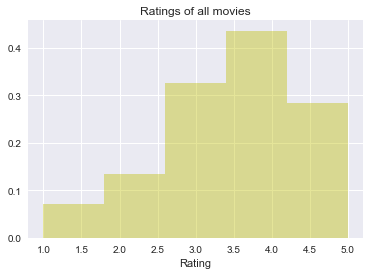

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

#Plot a histogram of the ratings of all movies
r = data['rating']
sns.distplot(r,bins = 5,hist = True, kde=False, color ='y', norm_hist = True, axlabel = 'Rating')
plt.title("Ratings of all movies")

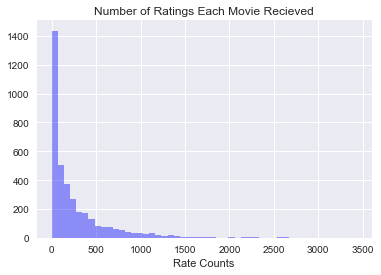

In [46]:
#Plot a histogram of the number of ratings each movie recieved
rate_count = data.groupby('movie_id').size().reset_index(name='counts')
#rate_count.max()
sns.distplot(rate_count['counts'],hist = True,kde=False, color ='b', axlabel = 'Rate Counts')
plt.title("Number of Ratings Each Movie Recieved")

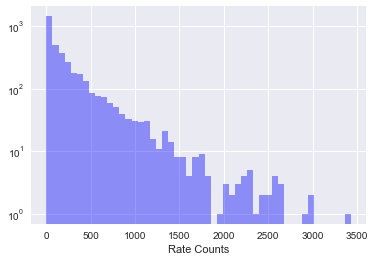

In [47]:
#semi-log distribution
f=sns.distplot(rate_count['counts'],hist = True,kde=False, color ='b', axlabel = 'Rate Counts')
f.set_yscale('log')
plt.show()

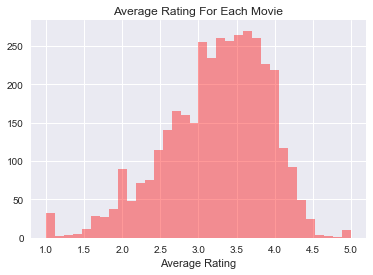

In [49]:
#What do you observe about the tails of the histogram where you use all the movies versus 
#the one where you only use movies rated more than 100 times?

#Plot a histogram of the average rating for each movie
movie_rate = pd.DataFrame(data[['movie_id','rating']])
ave_rating = movie_rate.groupby('movie_id').mean()
sns.distplot(ave_rating,hist = True, kde = False, color ='r', axlabel = 'Average Rating')
plt.title("Average Rating For Each Movie")

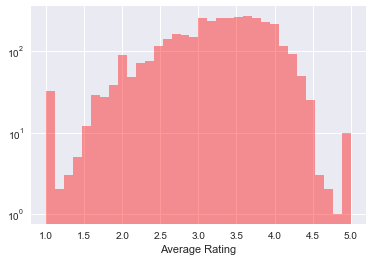

In [50]:
#semi-log distribution
g=sns.distplot(ave_rating,hist = True, kde = False, color ='r', axlabel = 'Average Rating')

g.set_yscale('log')
plt.show()

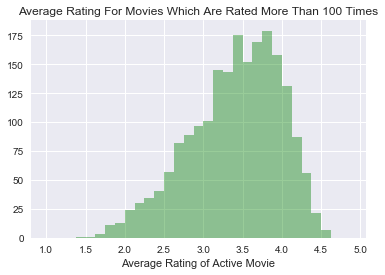

In [51]:
#Plot a histogram of the average rating for movies which are rated more than 100 times
ratings_by_title=movie_rate.groupby('movie_id').size()
active_movies = ratings_by_title.index[ratings_by_title > 100]
ave_rating_active = ave_rating.loc[active_movies]
newbins = np.arange(1,5,0.125)
sns.distplot(ave_rating_active,hist = True, kde = False, color ='g',bins = newbins,axlabel = 'Average Rating of Active Movie')
plt.title("Average Rating For Movies Which Are Rated More Than 100 Times")

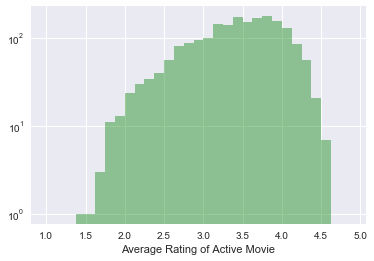

In [52]:
#semi-log distribution
#h=sns.distplot(ave_rating_active,hist = True, kde = False, color ='g', axlabel = 'Average Rating of Active Movie')
h=sns.distplot(ave_rating_active,hist = True, kde = False, color ='g',bins = newbins,axlabel = 'Average Rating of Active Movie')
h.set_yscale('log')
plt.show()

In [80]:
#labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
#data['age_group'] = pd.cut(data.age, range(0, 81, 10), right=False, labels=labels)
#print (data[['age', 'age_group']].drop_duplicates()[:10])

age_group_labels = {1: '[1, 18)', 18:'[18, 25)', 25:'[25, 35)', 35:'[35, 45)', 45:'[45, 50)', 50:'[50, 56)', 56:'56+'}
data['age_group'] = [age_group_labels.get(age) for age in data['age']]
print (data[['age', 'age_group']].drop_duplicates())                

    age age_group
0     1   [1, 18)
1    56       56+
2    25  [25, 35)
4    50  [50, 56)
5    18  [18, 25)
9    45  [45, 50)
20   35  [35, 45)


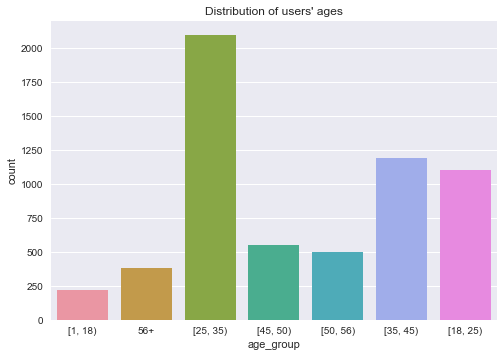

In [81]:
#Distribution of users' ages
sns.set(style="darkgrid")
users['age_group'] = [age_group_labels.get(age) for age in users['age']]
sns.countplot(x="age_group", data=users)
plt.title("Distribution of users' ages")

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

df = pd.DataFrame(data[['rating', 'age']])
ratings_by_age = df.groupby('age').size()
ratings_by_age_rating = df.groupby(['age', 'rating']).size()



for age in [1,18,25,35,45,50,56]:
    y = ratings_by_age_rating[age] /  ratings_by_age[age]
    y = y.values
    print(y)
    
    
raw_data = {'rating':['1','2','3','4','5'],
            '1':[0.08224615,  0.10962478,  0.234464,   0.32369262,  0.24997244],
            '18':[0.0711740,  0.12026523,  0.25935511,  0.32822444,  0.22098117],
            '25':[0.06041622,  0.11330128,  0.26364661,  0.34590298,  0.2167329],
            '35':[0.04556213,  0.10177234,  0.26627739,  0.36171817,  0.22466998],
            '45':[0.04076142,  0.10088123,  0.26677269,  0.36270372,  0.22888094],
            '50':[0.04066768,  0.08267347,  0.25472479,  0.36534694,  0.25658712],
            '56':[0.03999484,  0.07738525,  0.23628159,  0.36866942,  0.2776689]}



df = pd.DataFrame(raw_data,columns=['rating','1','18','25','35','45','50','56'])

df

[ 0.08224615  0.10962478  0.234464    0.32369262  0.24997244]
[ 0.07117405  0.12026523  0.25935511  0.32822444  0.22098117]
[ 0.06041622  0.11330128  0.26364661  0.34590298  0.2167329 ]
[ 0.04556213  0.10177234  0.26627739  0.36171817  0.22466998]
[ 0.04076142  0.10088123  0.26677269  0.36270372  0.22888094]
[ 0.04066768  0.08267347  0.25472479  0.36534694  0.25658712]
[ 0.03999484  0.07738525  0.23628159  0.36866942  0.2776689 ]


,rating,1,18,25,35,45,50,56
0,1,0.082246,0.071174,0.060416,0.045562,0.040761,0.040668,0.039995
1,2,0.109625,0.120265,0.113301,0.101772,0.100881,0.082673,0.077385
2,3,0.234464,0.259355,0.263647,0.266277,0.266773,0.254725,0.236282
3,4,0.323693,0.328224,0.345903,0.361718,0.362704,0.365347,0.368669
4,5,0.249972,0.220981,0.216733,0.224670,0.228881,0.256587,0.277669


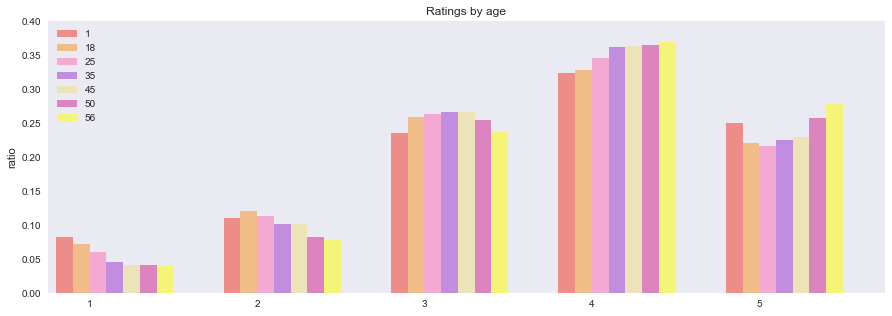

In [83]:
# Setting the positions and width for the bars
pos = list(range(len(df['rating']))) 
#bar width
width = 0.1 

# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5))

# Create a bar with age=1 data,
# in position pos,
plt.bar(pos, 
        #using df['1'] data,
        df['1'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224') 

# Create a bar with age=2 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['18'] data,
        df['18'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E') 


# Create a bar with age=25 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['25'] data,
        df['25'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#ff69b4') 

# Create a bar with age=35 data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using df['35'] data,
        df['35'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#9932cc') 

# Create a bar with age=45 data,
# in position pos + some width buffer,
plt.bar([p + width*4 for p in pos], 
        #using df['45'] data,
        df['45'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#eedd82') 

# Create a bar with age=50 data,
# in position pos + some width buffer,
plt.bar([p + width*5 for p in pos], 
        #using df['50'] data,
        df['50'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#d02090') 

# Create a bar with age=56 data,
# in position pos + some width buffer,
plt.bar([p + width*6 for p in pos], 
        #using df['56'] data,
        df['56'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#ffff00') 


# Set the y axis label
ax.set_ylabel('ratio')

# Set the chart's title
ax.set_title('Ratings by age')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['rating'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*9)
plt.ylim([0, 0.4] )

# Adding the legend and showing the plot
plt.legend(['1', '18', '25','35','45','50','56'], loc='upper left')
plt.grid()
plt.show()

In [84]:
data.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
             size      mean
age_group                  
56+         38780  3.766632
[1, 18)     27211  3.549520
[18, 25)   183536  3.507573
[25, 35)   395556  3.545235
[35, 45)   199003  3.618162
[45, 50)    83633  3.638062
[50, 56)    72490  3.714512

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

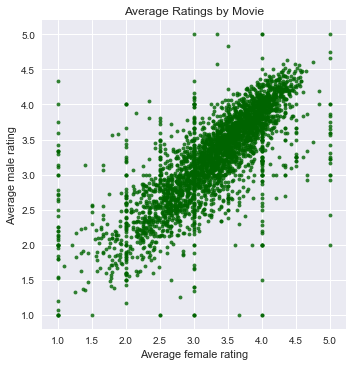

In [58]:
#Make a scatter plot of men versus women and their mean rating for every movie.
#Use a pivot table to compute mean ratings per title by gender
mean_ratings = data.pivot_table('rating',index = 'title',columns = 'gender',aggfunc = 'mean')

# Scatter this data.
sns.lmplot(x='F',y='M', data=mean_ratings, fit_reg=False, scatter_kws={"s": 15, 'color':'darkgreen'})
plt.title('Average Ratings by Movie')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')

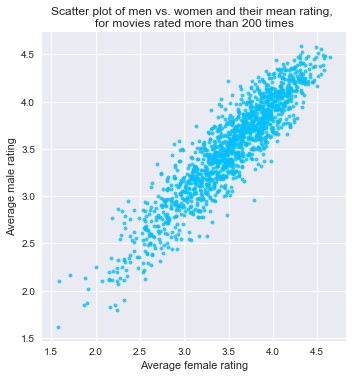

In [59]:
# Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
ratings_by_title= data.groupby('title').size()
active_movies = ratings_by_title.index[ratings_by_title > 200]
mean_rating_more_than_200 = mean_ratings.loc[active_movies]

# Scatter this data.
sns.lmplot(x='F',y='M', data=mean_rating_more_than_200, fit_reg=False, scatter_kws={"s": 15, 'color':'deepskyblue'})
plt.title('Scatter plot of men vs. women and their mean rating, \nfor movies rated more than 200 times')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')

In [34]:
#Compute the correlation coefficent between the ratings of men and women.
print('Correlation:')
print(mean_ratings.corr())
print('\nCorrelation with movie over 200 ratings:')
print(mean_rating_more_than_200.corr())


print ('\nCorrelation coefficient between average male and female ratings: {0}'.format
       (round(mean_ratings.M.corr(mean_ratings.F),5)))
print ('Correlation coefficient between average male and female ratings among movies with over 200 ratings: {0}'.format
       (round(mean_rating_more_than_200.M.corr(mean_rating_more_than_200.F),5)))


Correlation:
gender        F        M
gender                  
F       1.00000  0.76319
M       0.76319  1.00000

Correlation with movie over 200 ratings:
gender         F         M
gender                    
F       1.000000  0.918361
M       0.918361  1.000000

Correlation coefficient between average male and female ratings: 0.76319
Correlation coefficient between average male and female ratings among movies with over 200 ratings: 0.91836


Ratings of men and women have a positive linear relationship. For the movies that have over 200 ratings there is a higher correlation between average ratings of men and women.

Correlation of ratings by gender for age group 0-18: 0.34788
Correlation of ratings by gender for age group 18-24: 0.57562
Correlation of ratings by gender for age group 25-34: 0.68629
Correlation of ratings by gender for age group 35-44: 0.5994
Correlation of ratings by gender for age group 45-49: 0.56899
Correlation of ratings by gender for age group 50-55: 0.53695
Correlation of ratings by gender for age group 56+: 0.49216


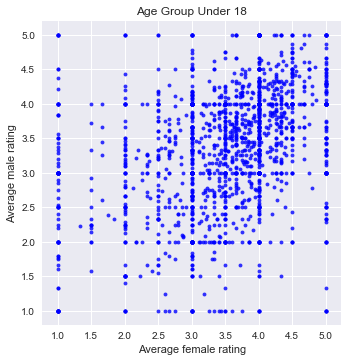

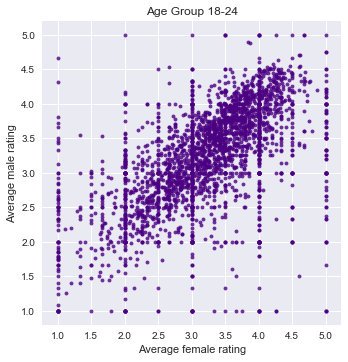

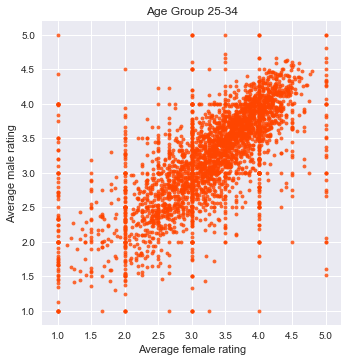

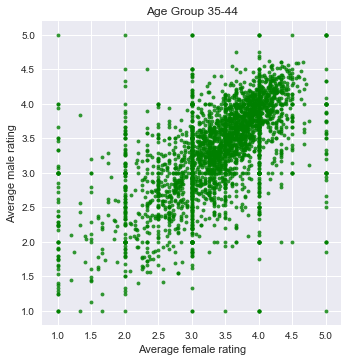

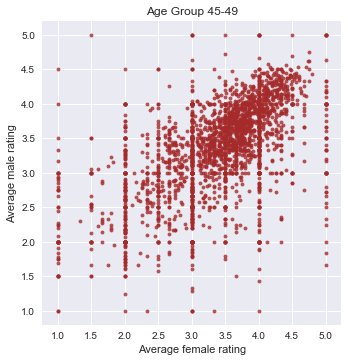

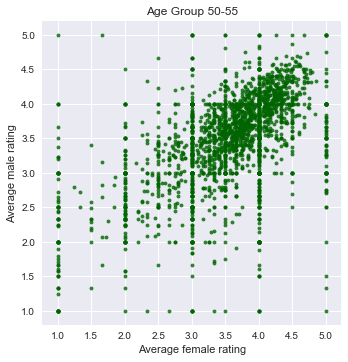

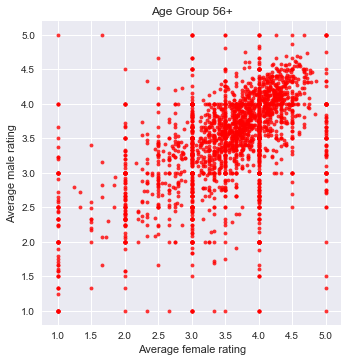

In [85]:
#Conjecture under what circumstances the rating given by one gender can be used 
#to predict the rating given by the other gender.
#Are men and women more similar when they are younger or older?
import seaborn as sns

age_group_a = data.query('age >= 0 & age < 18')
age_group_b = data.query('age >= 18 & age < 24')
age_group_c = data.query('age >= 25 & age < 34')
age_group_d = data.query('age >= 35 & age < 44')
age_group_e = data.query('age >= 45 & age < 49')
age_group_f = data.query('age >= 50 & age < 55')
age_group_g = data.query('age >= 56')



age_table_a = age_group_a.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_b = age_group_b.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_c = age_group_c.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_d = age_group_d.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_e = age_group_e.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_f = age_group_f.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_g = age_group_g.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()


#Age group 0-18
print('Correlation of ratings by gender for age group 0-18: {0}'.format(round(age_table_a.M.corr(age_table_a.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_a, fit_reg=False, scatter_kws={"s": 15, 'color':'blue'})
plt.title('Age Group Under 18')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')



#Age group 18-24
print('Correlation of ratings by gender for age group 18-24: {0}'.format(round(age_table_b.M.corr(age_table_b.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_b, fit_reg=False, scatter_kws={"s": 15, 'color':'indigo'})
plt.title('Age Group 18-24')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')


#Age group 25-34
print('Correlation of ratings by gender for age group 25-34: {0}'.format(round(age_table_c.M.corr(age_table_c.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_c, fit_reg=False, scatter_kws={"s": 15, 'color':'orangered'})
plt.title('Age Group 25-34')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')


#Age group 35-44
print('Correlation of ratings by gender for age group 35-44: {0}'.format(round(age_table_d.M.corr(age_table_d.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_d, fit_reg=False, scatter_kws={"s": 15, 'color':'green'})
plt.title('Age Group 35-44')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')

#Age group 45-49
print('Correlation of ratings by gender for age group 45-49: {0}'.format(round(age_table_e.M.corr(age_table_e.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_e, fit_reg=False, scatter_kws={"s": 15, 'color':'brown'})
plt.title('Age Group 45-49')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')

#Age group 50-55
print('Correlation of ratings by gender for age group 50-55: {0}'.format(round(age_table_f.M.corr(age_table_f.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_f, fit_reg=False, scatter_kws={"s": 15, 'color':'darkgreen'})
plt.title('Age Group 50-55')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')

#Age group 56+
print('Correlation of ratings by gender for age group 56+: {0}'.format(round(age_table_f.M.corr(age_table_g.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_f, fit_reg=False, scatter_kws={"s": 15, 'color':'red'})
plt.title('Age Group 56+')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')





From the results above we observe that the correlations among men and women rating are similar between the ages of 20 to 59. Thereofre it only make sense to combine this age range to have the claculations done to get a better correlation result as shown below.

Correlation of ratings by gender for age group 25+: 0.70481
Correlation with movie for age group 18-55: 0.75933


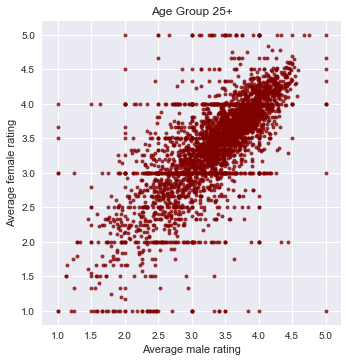

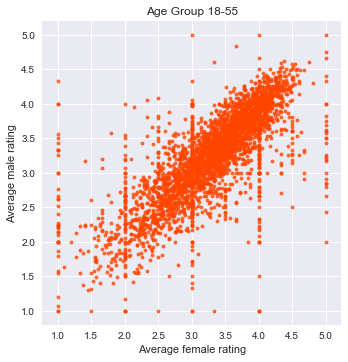

In [36]:
#age_group_1 = data.query('age >= 0 & age < 18')
age_group_2 = data.query('age >= 18 & age < 56')
#age_group_3 = data.query('age >= 56')
#age_table_1 = age_group_1.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
age_table_2 = age_group_2.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
#age_table_3 = age_group_3.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()

#Age group 0-18
#print('Correlation with movie for age group 0-18: {0}'.format(round(age_table_1.M.corr(age_table_1.F),5)))
# Scatter this data.
#sns.lmplot(x='F',y='M', data=age_table_1, fit_reg=False, scatter_kws={"s": 15, 'color':'indigo'})
#plt.title('Age Group Under 18')
#plt.ylabel('Average male rating')
#plt.xlabel('Average female rating')
#delete
age_group_h = data.query('age > 25')
age_table_h = age_group_h.pivot_table('rating', index='title',columns='gender', aggfunc='mean').dropna()
#Age group 18+
print('Correlation of ratings by gender for age group 25+: {0}'.format(round(age_table_h.M.corr(age_table_h.F),5)))
# Scatter this data.
sns.lmplot(x='M',y='F', data=age_table_h, fit_reg=False, scatter_kws={"s": 15, 'color':'maroon'})
plt.title('Age Group 25+')
plt.ylabel('Average female rating')
plt.xlabel('Average male rating')

#Age group 18-56
print('Correlation with movie for age group 18-55: {0}'.format(round(age_table_2.M.corr(age_table_2.F),5)))
# Scatter this data.
sns.lmplot(x='F',y='M', data=age_table_2, fit_reg=False, scatter_kws={"s": 15, 'color':'orangered'})
plt.title('Age Group 18-55')
plt.ylabel('Average male rating')
plt.xlabel('Average female rating')


#Age group 45+
#print('Correlation with movie for age group 56+: {0}'.format(round(age_table_3.M.corr(age_table_3.F),5)))
# Scatter this data.
#sns.lmplot(x='F',y='M', data=age_table_3, fit_reg=False, scatter_kws={"s": 15, 'color':'olive'})
#plt.title('Age Group 56+')
#plt.ylabel('Average male rating')
#plt.xlabel('Average female rating')

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

Most divisive movies:

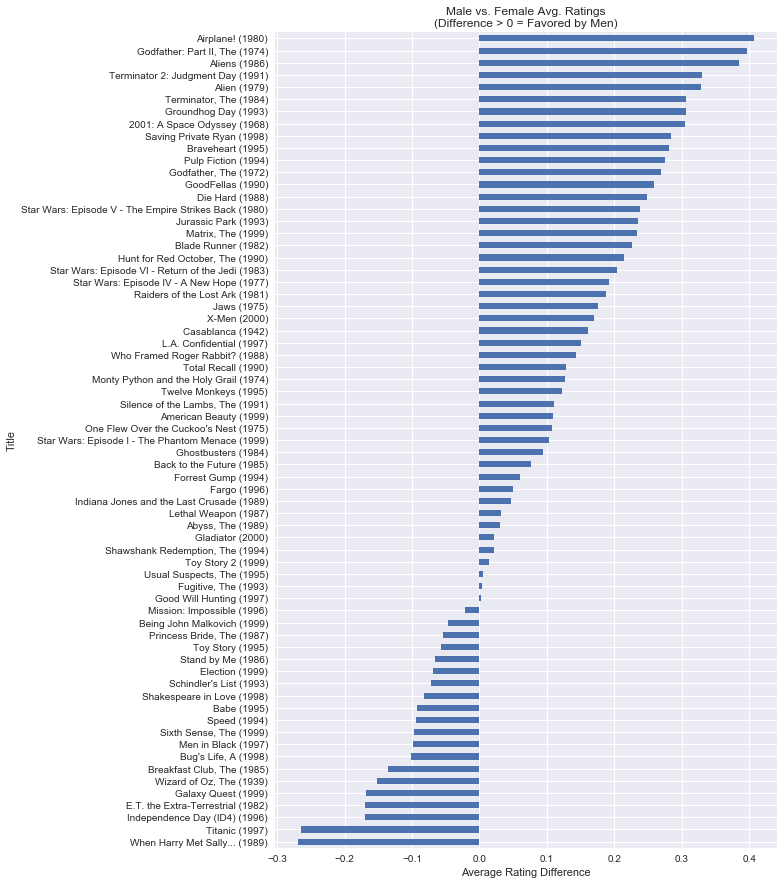

In [52]:
mostrated_movies2 = ratings_by_title.index[ratings_by_title > 1500]
pivotedd = data.pivot_table('rating',index=['movie_id', 'title'],columns='gender')
pivotedd['diff'] = pivotedd.M - pivotedd.F
pivotedd.reset_index('movie_id', inplace=True)
disagreements = pivotedd[pivotedd.movie_id.isin(mostrated_movies2)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [61]:
ratings_count = data.groupby('movie_id').size()
ratings_count = ratings_count[ratings_count > 250]
tmp_index = pd.DataFrame({'movie_id': ratings_count.index, 'rated_count': ratings_count})
frequent_movie = pd.merge(tmp_index, data, how='inner', on=['movie_id'])

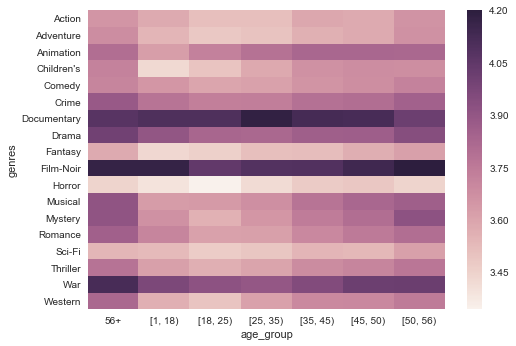

In [86]:
#plot heatmap of age-genres-rating
movies = frequent_movie.drop('genres', axis=1).join(frequent_movie['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
ave_age_rate = movies['rating'].groupby([movies['genres'],movies['age_group']]).mean().unstack()
sns.heatmap(ave_age_rate)
#ave_age_size = movies['rating'].groupby([movies['genres'],movies['age_group']]).size().unstack()
#sns.heatmap(ave_age_size)

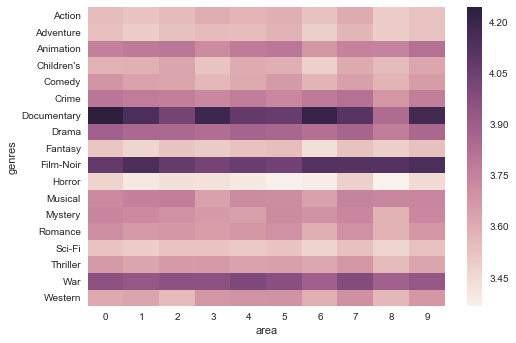

In [87]:
#plot heatmap of area-genres-rating
movies['area'] = [item[0] for item in movies['zip']]
#print(set(movies['area']))
ave_area_rate = movies['rating'].groupby([movies['genres'],movies['area']]).mean().unstack()
sns.heatmap(ave_area_rate)

## Find unique genres and calculate the average rating for each genre for male and female.

In [10]:
#Finding unique genres
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))
dummies = pd.DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
for i, gen in enumerate(movies.genres):
    dummies.loc[i,gen.split('|')]=1
movies_windic=movies.join(dummies)
movies_windic.loc[0]

new_data = pd.merge(pd.merge(pd.merge(ratings,users),movies), movies_windic)

In [ ]:
#Number of movies in each genres
import matplotlib.pyplot as plt
moviegenre = movies_windic
moviegenre.drop(moviegenre[['movie_id','title','genres']],axis=1,inplace=True)

moviegenre.sum().plot(kind='bar',color='#EE3224')
plt.title('Number of Movies in Each Genre')

In [ ]:
#Total number of ratings received for each type of movie
genres_rating_received = new_data
genres_rating_received.drop(genres_rating_received.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
genres_rating_received.sum().plot(kind='bar')
plt.title('Number of total ratings for Movies in each genre')

In [20]:
# Total number of female and male
genres = data['genres']
all_genres = [string.split('|') for string in genres]
total_genre_series = pd.DataFrame(all_genres, index=data.index)

total_gender_counts = data.pivot_table('rating', index = 'gender', aggfunc = 'count')

gender_counts = pd.concat([total_gender_counts],axis=1)
gender_counts.columns = ['total_gender_counts']
gender_counts

,total_gender_counts
gender,
F,246440
M,753769


In [21]:
movies_1 = frequent_movie.drop('genres', axis=1).join(frequent_movie['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

total_gender_counts = movies_1.pivot_table('rating', index = 'genres', columns = 'gender', aggfunc = 'mean')

#Sorted average rating for female based on genres
genre_female = pd.DataFrame()
genre_female['female'] = total_gender_counts['F']
genre_female['male'] = total_gender_counts['M']

genre_movies_female = genre_female.sort_values(by='female',ascending=False)
genre_movies_female


,female,male
genres,,
Documentary,4.135135,4.135769
Film-Noir,4.043739,4.124527
War,3.921579,3.953934
Musical,3.862081,3.657053
Drama,3.855978,3.855053
Animation,3.837322,3.749148
Romance,3.749225,3.630318
Crime,3.733396,3.772815
Children's,3.718653,3.533618


In [25]:
#Sorted average rating for male based on genres

genre_male = pd.DataFrame()
genre_male['female'] = total_gender_counts['F']
genre_male['male'] = total_gender_counts['M']


genre_movies_male = genre_male.sort_values(by='male',ascending=False)
genre_movies_male

,female,male
genres,,
Documentary,4.135135,4.135769
Film-Noir,4.043739,4.124527
War,3.921579,3.953934
Drama,3.855978,3.855053
Crime,3.733396,3.772815
Animation,3.837322,3.749148
Mystery,3.716185,3.701563
Western,3.556539,3.665983
Musical,3.862081,3.657053


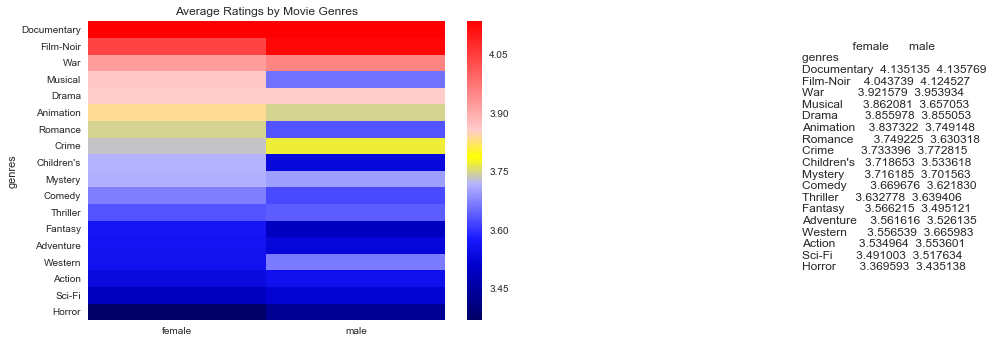

In [26]:
#Comparison between the rating for male and female
import matplotlib.colors as mcolors

plt.text(4,3,genre_movies_female)
plt.title('Average Ratings by Movie Genres')
plt.ylabel('Genres')
plt.xlabel('Ratings')
cmap = mcolors.LinearSegmentedColormap.from_list("n",['#000066','#000099','#0000cc','#1a1aff','#6666ff','#b3b3ff',
                       '#ffff00','#ffcccc','#ff9999','#ff6666','#ff3333','#ff0000'])

sns.heatmap(genre_movies_female,cmap=cmap)

In [3]:
# Add occupation names to dataframe according to README in movielens data
occupation_names={0:  "other",1:  "academic/educator",3:  "clerical/admin",4:  "college/grad student",\
                  5:  "customer service", 6:  "doctor/health care", 7:  "executive/managerial",8:  "farmer",9:  "homemaker",\
                 10:  "K-12 student",11:  "lawyer",12:  "programmer",13:  "retired",14:  "sales/marketing",\
                 15:  "scientist",16:  "self-employed",17:  "technician/engineer",18:  "tradesman/craftsman",\
                 19:  "unemployed",20:  "writer"}
data['occupation_names'] = [occupation_names.get(index) for index in data['occupation']]
#print(data)



In [89]:
#find out each user_id's occupation
user_size_occupation=data[['user_id','occupation_names']].drop_duplicates()
user_size_occupation[:20]

,user_id,occupation_names
0,1,K-12 student
1,2,self-employed
2,12,programmer
3,15,executive/managerial
4,17,academic/educator
5,18,clerical/admin
6,19,K-12 student
7,24,executive/managerial
8,28,academic/educator
9,33,clerical/admin


In [90]:
#count the number of people in each occupation
occupation_size = user_size_occupation.groupby('occupation_names').count()
occupation_size

,user_id
occupation_names,
K-12 student,195
academic/educator,528
clerical/admin,173
college/grad student,759
customer service,112
doctor/health care,236
executive/managerial,679
farmer,17
homemaker,92


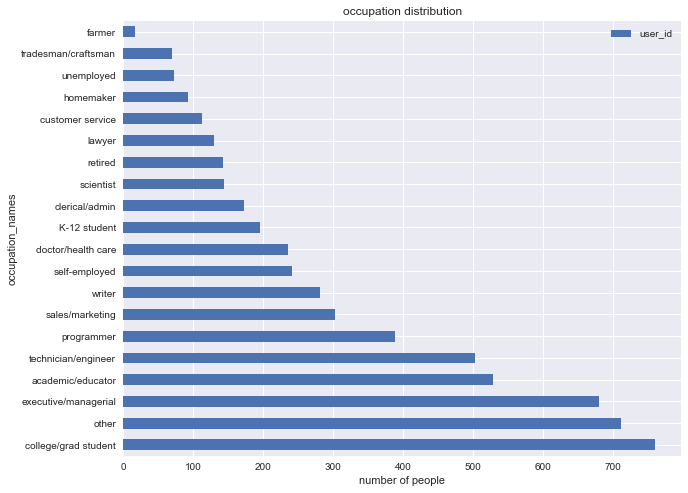

In [91]:
#make a histogram of occupation distribution
occupation_distribution = occupation_size.sort_values(by='user_id',ascending=False).plot(kind='barh',rot=0,figsize=(10,8))
occupation_distribution.set_xlabel("number of people")
occupation_distribution.set_title("occupation distribution")

In [92]:
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
data_new2 = pd.DataFrame(data[['rating','title','occupation_names','age_group']])

ratings_occupation=data_new2.groupby('occupation_names').agg({'rating': [np.mean, np.std]})
ratings_occupation.sort_values(('rating', 'mean'),ascending=False)

rating          
                          mean       std
occupation_names                        
retired               3.781736  1.037604
scientist             3.689774  1.066078
doctor/health care    3.661578  1.109623
homemaker             3.656589  1.033470
clerical/admin        3.656516  1.097272
programmer            3.654001  1.083001
sales/marketing       3.618481  1.092451
lawyer                3.617371  1.148651
technician/engineer   3.613574  1.075178
executive/managerial  3.599772  1.083684
self-employed         3.596575  1.074638
academic/educator     3.576642  1.107499
other                 3.537544  1.126175
customer service      3.537529  1.096425
college/grad student  3.536793  1.165478
K-12 student          3.532675  1.224677
tradesman/craftsman   3.530117  1.065832
writer                3.497392  1.154047
farmer                3.466741  1.103097
unemployed            3.414050  1.219017

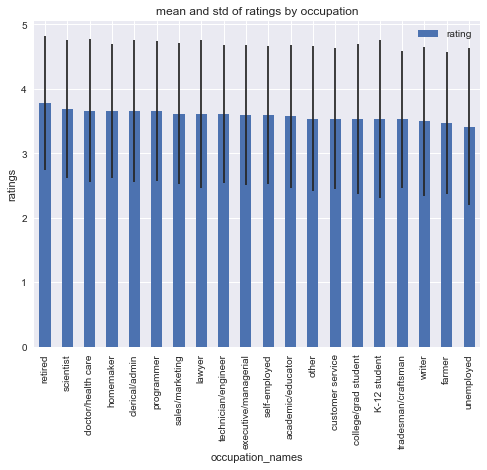

In [93]:
#plot histogram

mean_ratings_job = data_new2.groupby(('occupation_names')).mean().sort_values(by='rating',ascending=False)
std_ratings_job = data_new2.groupby(('occupation_names')).std()


df = mean_ratings_job.plot(yerr=std_ratings_job, kind='bar',figsize=[8,6])
df.set_ylabel("ratings")
df.set_title("mean and std of ratings by occupation")



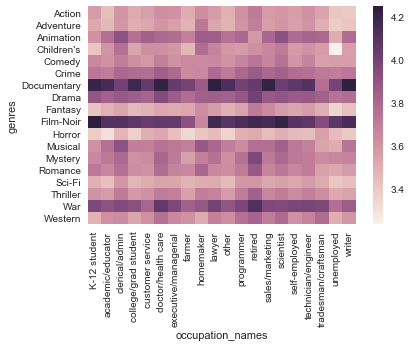

In [24]:
ratings_count = data.groupby('movie_id').size()
ratings_count = ratings_count[ratings_count > 250]
tmp_index = pd.DataFrame({'movie_id': ratings_count.index, 'rated_count': ratings_count})
frequent_movie = pd.merge(tmp_index, data, how='inner', on=['movie_id'])

movies_occupation = frequent_movie.drop('genres', axis=1).join(frequent_movie['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))
ave_job_rate = movies_occupation['rating'].groupby([movies_occupation['genres'],movies_occupation['occupation_names']]).mean().unstack()
sns.heatmap(ave_job_rate)

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **